# Neural Network Models for Object Recognition - Using CIFAR10

# 1- Imports

In [ ]:
from numpy.random import seed
seed(888)

#from tensorflow import set_random_seed
#set_random_seed(112)
import tensorflow
tensorflow.random.set_seed(112)

In [ ]:
import os
import numpy as np
import itertools

import tensorflow as tf
import seaborn as sns
import keras
from keras.datasets import cifar10 # importing the dataset

from keras.models import Sequential       #to define model/ layers
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.layers import Dropout, Activation
from keras.layers import MaxPooling2D

from sklearn.metrics import confusion_matrix

# To Explore the images
from IPython.display import display
from keras.preprocessing.image import array_to_img

from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd

We are using Tensorflow to power Keras

# 2- Loading the data

In [ ]:
# Getting the dataset as a Tuple

(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# 3- EDA - Exploratory data analysis

In [ ]:
x_train_all.shape

(50000, 32, 32, 3)

In [ ]:
number_of_images, x, y, c = x_train_all.shape
print(f'Number of images = {number_of_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

Number of images = 50000 	| width = 32 	| height = 32 	| channels = 3


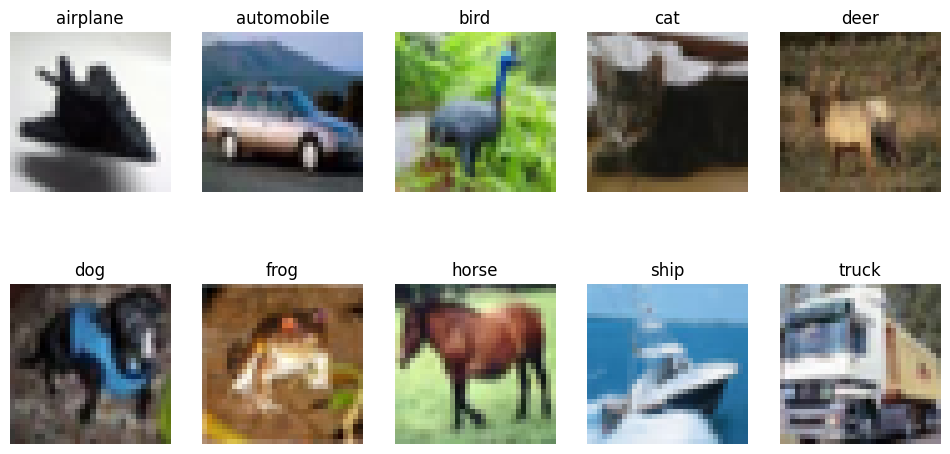

In [ ]:
LABEL_NAMES = ['airplane', 'automobile','bird','cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

images = [x_train_all[(y_train_all.flatten() == i).argmax()] for i in range(10)]


plt.figure(figsize=(12, 6))
for i, image in enumerate(images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(LABEL_NAMES[i])
    plt.axis('off')

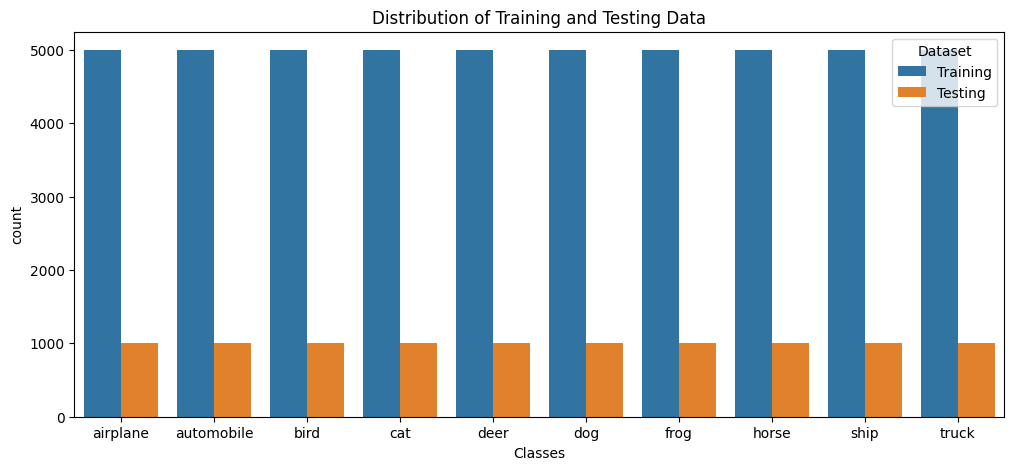

In [ ]:
# Combine training and testing labels for easier plotting
all_labels = np.concatenate([y_train_all.ravel(), y_test.ravel()])
dataset_type = ['Training'] * len(y_train_all.ravel()) + ['Testing'] * len(y_test.ravel())

# Create a DataFrame for Seaborn
data = pd.DataFrame({'Label': all_labels, 'Dataset': dataset_type})

# Create the countplot
plt.figure(figsize=(12, 5))
sns.countplot(x='Label', hue='Dataset', data=data)
plt.title('Distribution of Training and Testing Data')
plt.xlabel('Classes')
plt.xticks(ticks=range(10), labels=LABEL_NAMES)
plt.show()

# 4- Data preprocessing

In [ ]:
#Normalise the data so that to make our machine learning model, be able to learn easier from the data
#Each pixel value of the photo(for every channel) takes a value within the range of 0-255 so we divide each pixel vbalue with 255 and transform the range between 0-1
x_train_all = x_train_all / 255.0
x_test = x_test / 255.0

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

## Creating Categorical Data

In [ ]:
#Creating the categorical encoding for the 'y_train' and 'y_test' data
y_train_cat_all = to_categorical(y_train_all,10)
y_test_cat = to_categorical(y_test,10)

In [ ]:
y_train_cat_all

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

# 5- Train/Validation split

In [ ]:
VALIDATION_SIZE = 10000

In [ ]:
# 20% For the validation dataset
x_val = x_train_all[:VALIDATION_SIZE]
y_val_cat = y_train_cat_all[:VALIDATION_SIZE]

In [ ]:
# The rest is for the training
x_train = x_train_all[VALIDATION_SIZE:]
y_train_cat = y_train_cat_all[VALIDATION_SIZE:]

In [ ]:
print('y_train_cat shape:', y_train_cat.shape)
print('y_val_cat shape:', y_val_cat.shape)
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

y_train_cat shape: (40000, 10)
y_val_cat shape: (10000, 10)
40000 train samples
10000 validation samples
10000 test samples


# 6- Building The Model

In [ ]:
model = Sequential()

# CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# a softmax classifier
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,122,186 (8.10 MB)

 Trainable params: 2,122,186 (8.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7- Training The Model

In [ ]:
#Add early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
history = model.fit(x_train,y_train_cat,epochs=25,validation_data=(x_val,y_val_cat),callbacks=[early_stop])

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 126s 99ms/step - accuracy: 0.3464 - loss: 1.7706 - val_accuracy: 0.5440 - val_loss: 1.2723
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 98ms/step - accuracy: 0.5462 - loss: 1.2631 - val_accuracy: 0.6268 - val_loss: 1.0486
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 145s 101ms/step - accuracy: 0.6083 - loss: 1.1038 - val_accuracy: 0.6620 - val_loss: 0.9634
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 100ms/step - accuracy: 0.6426 - loss: 1.0125 - val_accuracy: 0.6798 - val_loss: 0.9085
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 135s 95ms/step - accuracy: 0.6643 - loss: 0.9465 - val_accuracy: 0.6813 - val_loss: 0.9108
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 140s 93ms/step - accuracy: 0.6875 - loss: 0.8872 - val_accuracy: 0.6968 - val_loss: 0.8597
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 159s 107ms/step - accuracy: 0.7071 - loss: 0.8300 - val_accuracy: 0.7132 - val_loss: 0.8235
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 125s 94ms/step - accurac

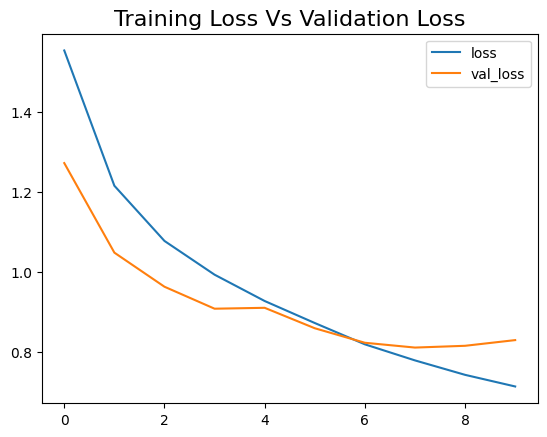

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics
metrics[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

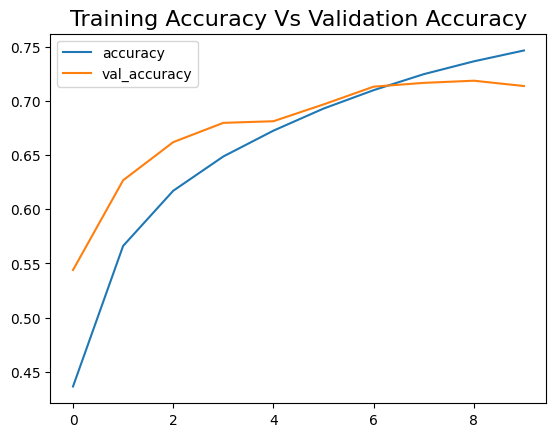

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

# 8- Model Evaluation

In [ ]:
#Evaluate For Testing data
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7194 - loss: 0.8284
Test Accuracy: 0.72


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


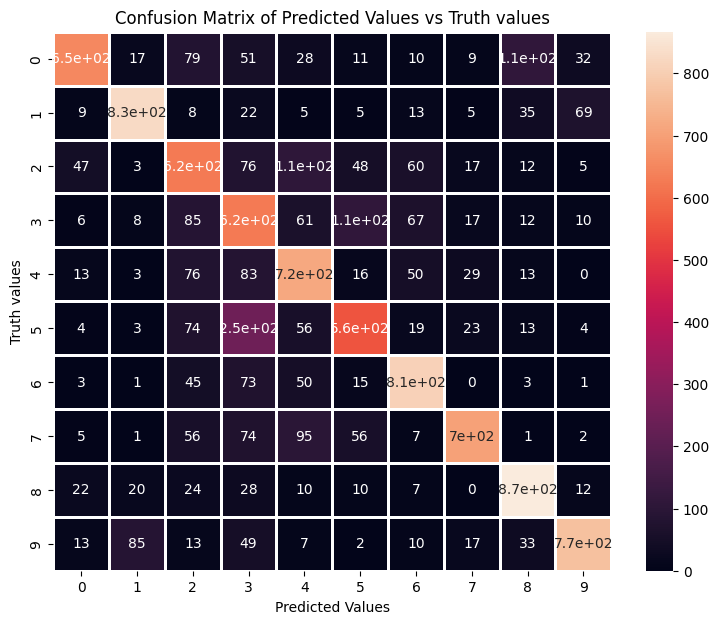

In [ ]:
#Confusion matrix
import seaborn as sns

predictions = np.argmax(model.predict(x_test), axis=-1)
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,linewidths=1,linecolor='white')
plt.ylabel('Truth values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix of Predicted Values vs Truth values')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


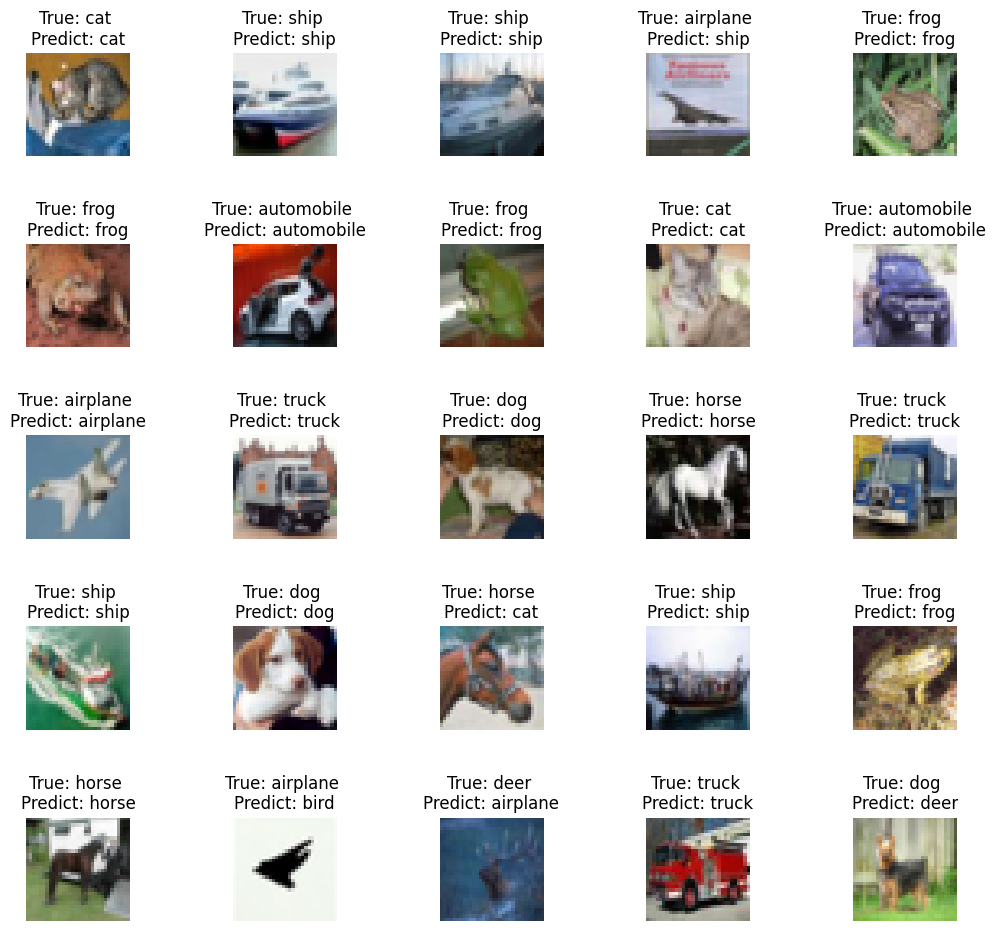

In [ ]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])

    # Get the predicted label index
    predicted_label = np.argmax(model.predict(np.expand_dims(x_test[i], axis=0)))

    axes[i].set_title("True: %s \nPredict: %s" % (LABEL_NAMES[y_test[i][0]], LABEL_NAMES[predicted_label]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)
plt.show()

# 9- Single Image Test

In [ ]:
def show_test(number):
  fig = plt.figure(figsize = (3,3))
  test_image = np.expand_dims(x_test[number], axis=0)
  test_result = model.predict(test_image)
  plt.imshow(x_test[number])
  predicted_label = np.argmax(test_result)  # Get the index of the highest probability
  plt.title("Predicted: {} \nTrue Label: {}".format(LABEL_NAMES[predicted_label],
                                                      LABEL_NAMES[y_test[number][0]]))
  plt.show()  # Display the plot

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


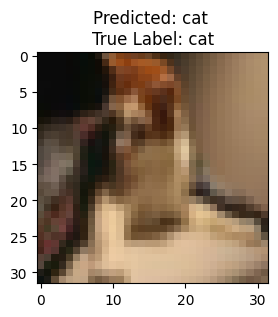

In [ ]:
show_test(61)